# Unit 5 Data Wrangling

## 0. Clean up CSVs and Excel files before importing

#### 1. Mortgage Rate 

1.1 Simplified the format. 

1.2 formatted from horizontal to vertical and arranged by year and month. 

#### 2. Population

2.1. Simplifed the format. Removed redundant header rows. 

#### 3. Unemployment data

3.1. Updated date format to yyyy-mm-dd format.

3.2. Saved only the CA counties that I needed. (only did SF and Alameda county. Need to do more)

#### 4. Temperature data: 

4.1. Updated date format to yyyy-mm-dd format.

4.2. Filtered data only to California and to 2001 - 2013. 

#### 5. Drought data: 

5.1. Updated date format to yyyy-mm-dd format.

5.1. Sorted data by county, start and end date

#### 6. Precipitation data:

6.1. Added header. 

6.2. Removed unnecessary data such as pre-calculated mean, median, etc. 

#### 7. Zillow Sale Price by County data - 

7.1. Filter out and saved only CA county data. 

7.2. Removed unnecessary columns - State and SizeRank

#### 8. For all files, filled in empty data with "NA"


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

## 1. Sale Price by County

#### Frequency: Monthly
#### Time range: 2008/03 - 2019 /05
#### No Data: NA

In [2]:
# Clean Sales Price 
# read in California counties' sales price excel. Set encoding

CA_sales_prices = pd.read_excel(r'C:\Users\yulmee\Documents\Yul-Mee\Springboard\Capstone 1\dataset\cleaned\Zillow_Sale_Prices_County_2008_2015_cleaned.xlsx',encoding='latin-1')

In [3]:
CA_sales_prices.head()

,RegionID,RegionName,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,3101,Los Angeles County,463600.0,450100.0,433600.0,420900.0,403800.0,388500.0,372200.0,360700.0,...,576400,581500,590900,598100,596600.0,597800.0,595700.0,602800.0,605800.0,605100.0
1,2841,San Diego County,403100.0,394400.0,380000.0,368000.0,352800.0,341100.0,331100.0,320900.0,...,556600,559200,560800,555700,553100.0,551600.0,555100.0,553100.0,558000.0,NaN
2,1286,Orange County,514100.0,505400.0,489400.0,471100.0,457000.0,444200.0,434300.0,422200.0,...,705400,710900,709300,706000,696600.0,695600.0,694900.0,698700.0,701400.0,699600.0
3,2832,Riverside County,316800.0,299400.0,282700.0,270500.0,258800.0,246700.0,236000.0,228200.0,...,365000,369800,371800,374900,369900.0,372500.0,372800.0,374200.0,371800.0,371600.0
4,3250,San Bernardino County,267700.0,255500.0,241400.0,232900.0,219500.0,211100.0,200700.0,194800.0,...,316500,317100,318500,316300,312600.0,313900.0,318400.0,323200.0,325000.0,329800.0


In [9]:
# Convert year-month to date instead: 2008-10 to 2008-10-01 and then to datetime type. 
# For my notes - see http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/ 
# section: Use .apply with axis=1 to send every single row to a function
def set_first_of_month(row):
    datestring = row['year-month'] +'-01'
    return datetime.strptime(datestring, '%Y-%m-%d')

# select county data

def get_cleaned_county_sales_price(CA_sales_prices, county_name):

    county_sales_price = CA_sales_prices.loc[CA_sales_prices['RegionName'] == county_name]
    
    # Melt table to get year and month prices as rows. 
    alm_melt = county_sales_price.melt(id_vars=['RegionID', 'RegionName'], var_name='year-month', value_name='SalePrice')

    # set month and year columns and drop the intermedia 'year-month' column
    alm_melt['Month'] = alm_melt['year-month'].apply(lambda s: int(s[5:7]))
    alm_melt['Year'] = alm_melt['year-month'].apply(lambda s: int(s[0:4]))
    
    alm_melt['Date']=alm_melt.apply(set_first_of_month, axis=1)

    sales_price_final = alm_melt
    
    return sales_price_final


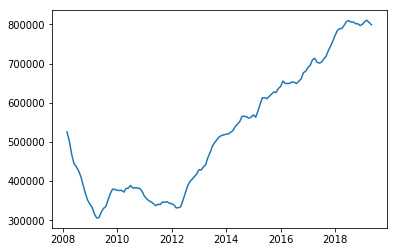

In [10]:
# Get cleaned sales price data for Alameda county
alameda_county_name = 'Alameda County'
alameda_sales_price_final = get_cleaned_county_sales_price(CA_sales_prices, alameda_county_name)
 
# plot 
pp.plot(alameda_sales_price_final['Date'], alameda_sales_price_final['SalePrice'])
pp.show()


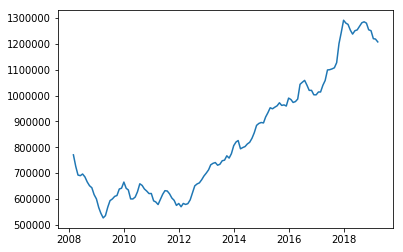

In [12]:
# Get cleaned sales price data for San Mateo county
san_mateo_county_name = 'San Mateo County'
san_mateo_sales_price_final = get_cleaned_county_sales_price(CA_sales_prices, san_mateo_county_name)

# plot
pp.plot(san_mateo_sales_price_final['Date'], san_mateo_sales_price_final['SalePrice'])
pp.show()

## 2. Unemployment data - monthly by county

#### Frequency: Monthly
#### Time range: 1990/01 - 2019/05

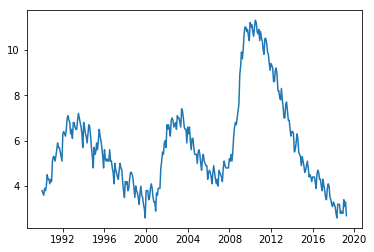

In [38]:
# Read in Alameda counties' sales price excel. Set encoding

alameda_unemploy = pd.read_excel(r'C:\Users\yulmee\Documents\Yul-Mee\Springboard\Capstone 1\dataset\cleaned\Unemployment_CAALAM1URN_CA_Alameda_County_cleaned.xlsx',encoding='latin-1')
# Update DATE to datetime type.
alameda_unemploy['DATE'] = pd.to_datetime(alameda_unemploy['DATE'])  

# Rename columns to be consistent
alameda_unemploy.rename(columns={'DATE':'Date',
                          'CAALAM1URN':'UnemployRate'}, 
                 inplace=True)

# Separate Date into Year and Month - all other monthly data will have separate Year and Month.
alameda_unemploy['Month'] = alameda_unemploy['Date'].apply(lambda s: s.month)
alameda_unemploy['Year'] = alameda_unemploy['Date'].apply(lambda s: s.year)


pp.plot(alameda_unemploy['Date'], alameda_unemploy['UnemployRate'])
pp.show()


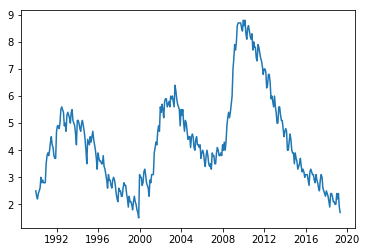

In [37]:
# Read in San Mateo counties' sales price csv. Set encoding

san_mateo_unemploy = pd.read_csv(r'C:\Users\yulmee\Documents\Yul-Mee\Springboard\Capstone 1\dataset\cleaned\Unemployment_CASANM0URN_San Mateo County_cleaned.csv',encoding='latin-1')
# Update DATE to datetime type.
san_mateo_unemploy['DATE'] = pd.to_datetime(san_mateo_unemploy['DATE'])  
# Rename columns to be consistent
san_mateo_unemploy.rename(columns={'DATE':'Date',
                          'CASANM0URN':'UnemployRate'}, 
                 inplace=True)

# Separate Date into Year and Month - all other monthly data will have separate Year and Month.
san_mateo_unemploy['Month'] = san_mateo_unemploy['Date'].apply(lambda s: s.month)
san_mateo_unemploy['Year'] = san_mateo_unemploy['Date'].apply(lambda s: s.year)

san_mateo_unemploy.head()

pp.plot(san_mateo_unemploy['Date'], san_mateo_unemploy['UnemployRate'])
pp.show()

## 3. SF Bay Area Precipitation 2010 - 2019 by city

#### Frequency: Monthly
#### 2010/10 - 2019/04
#### No data = 'M'

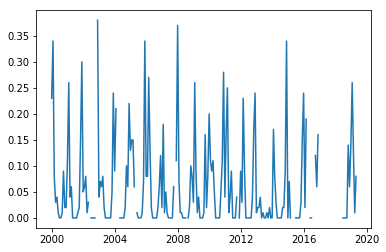

In [38]:
# read in Oakland precipation data that represents Alameda county
alameda_oakland_precipitation = pd.read_excel(r'C:\Users\yulmee\Documents\Yul-Mee\Springboard\Capstone 1\dataset\cleaned\SF Bay Area Precipitation 2010 - 2019 by city.xlsx', sheet_name='Oakland', encoding='latin-1')

# Convert year-month to date instead: 2008-10 to 2008-10-01 and then to datetime type. 
# For my notes - see http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/ 
# section: Use .apply with axis=1 to send every single row to a function
def set_first_of_month_year(row):
    datestring = str(int(row['Year'])) + '-' + str(int(row['Month']))+'-01'
    return datetime.strptime(datestring, '%Y-%m-%d') 

def clean_precipitation_data(precipitationdf):
    # Melt table to get year and month prices as rows. 
    prec_melt = precipitationdf.melt(id_vars=['Year'], value_vars=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], var_name='Month_name', value_name='Rate')

    # Convert month name to number
    prec_melt['Month'] = prec_melt['Month_name'].apply(lambda s: datetime.strptime(s, '%b').month)

    precipitation_final = prec_melt

    # Clean up Rate- convert Rate to numeric 
    # and set non-numeric values (NA's) to NaN (errors='coerce')
    precipitation_final['Rate'] = pd.to_numeric(precipitation_final['Rate'], errors='coerce')

    # Forward fill any nan data
    # In this case, in some areas, there is too many NaNs, it does not fill everything.
    precipitation_final.fillna(method='ffill')

    # remove Month_name - no longer needed
    precipitation_final.drop(['Month_name'],axis=1,inplace=True) 

    # Generate Date from Month and Year string.
    precipitation_final['Date']=precipitation_final.apply(set_first_of_month_year, axis=1)

    # sort by Date (for plotting)
    precipitation_final.sort_values(by=['Date'], inplace=True)
    
    return precipitation_final


alameda_precipitation_final = clean_precipitation_data(alameda_oakland_precipitation)

# Plot data
pp.plot(alameda_precipitation_final['Date'], alameda_precipitation_final['Rate'])
pp.show()


In [46]:
# read in SF Airport precipation data that represents San Mateo county
san_mateo_sfo_precipitation = pd.read_excel(r'C:\Users\yulmee\Documents\Yul-Mee\Springboard\Capstone 1\dataset\cleaned\SF Bay Area Precipitation 2010 - 2019 by city.xlsx', sheet_name='San Francisco Airport', encoding='latin-1')
 
san_mateo_precipitation_final = clean_precipitation_data(san_mateo_sfo_precipitation)

# Plot data
#pp.plot(san_mateo_precipitation_final['Date'], san_mateo_precipitation_final['Rate'])
#pp.show()

san_mateo_precipitation_final.head()

,Year,Rate,Month,Date
0,2000,0.19,1,2000-01-01
20,2000,0.29,2,2000-02-01
40,2000,0.06,3,2000-03-01
60,2000,0.04,4,2000-04-01
80,2000,0.02,5,2000-05-01


## 4. Mortgage rate - National

#### Frequency: Monthly
#### Range: 2010/01 - 2018/12
#### At National level, not at county level.

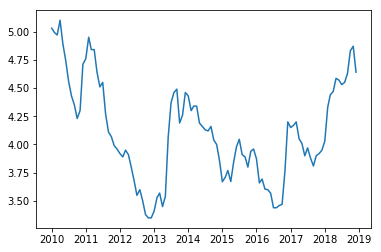

In [43]:
mort_rt = pd.read_excel(r'C:\Users\yulmee\Documents\Yul-Mee\Springboard\Capstone 1\dataset\cleaned\Cleaned_MortageRate_2010-2018.xlsx',  encoding='latin-1')


# Generate Date from Month and Year string.
mort_rt['Date']=mort_rt.apply(set_first_of_month_year, axis=1)

mort_rt.head()

# Plot data
pp.plot(mort_rt['Date'], mort_rt['Rate'])
pp.show()

## 5. Severe Drought data (D4 level) for more than 4 weeks at County level

#### Range: 1/1/2010 - 1/1/2019

In [44]:
drought_prd_in = pd.read_excel(r'C:\Users\yulmee\Documents\Yul-Mee\Springboard\Capstone 1\dataset\cleaned\Drought_dm_export_CA_20100101_20190101_D4 level for at least 4 weeks.xlsx',  encoding='latin-1')

# remove unnecessary columns
drought_prd_in.drop(['State'],axis=1,inplace=True) 
drought_prd_in.drop(['FIPS'],axis=1,inplace=True) 

# update date fields to datetime type
drought_prd_in['StartDate'] = pd.to_datetime(drought_prd_in['StartDate'])  
drought_prd_in['EndDate'] = pd.to_datetime(drought_prd_in['EndDate'])  

# limit to counties needed - Alameda and San Mateo
county_name='Alameda County'
alameda_drought_prd = drought_prd_in.loc[drought_prd_in['County'] == county_name]

county_name='San Mateo County'
san_mateo_drought_prd = drought_prd_in.loc[drought_prd_in['County'] == county_name]

san_mateo_drought_prd.head()
 

,StartDate,EndDate,ConsecutiveWeeks,County
41,2014-02-25,2014-12-09,42,San Mateo County
